## Convolutional Neural Network (CNN)

### คือ neural network ชนิดนึงที่จำลองการมองเห็นโดยแบ่งรูปภาพเป็นเป็นพื้นที่ Pixel ย่อยๆเพื่อทำการวิเคราะห์ Image Metric
 - 2 x 2 คือ GrayScale หรือรูปภาพขาวดำ
 - 3 X 3 คือ Color นั่นเอง

### ซึ่งการทำ CNN จะมีวิธีการอยู่ 4 Step คือ

![alt text](https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1)
<br>
(source: https://www.cusabio.com/statics/images/Sthttps://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1)

1. Convolutional: การทำคูณ matrix ระหว่าง Input img กับ Feature Detector ซึ่จะได้ผลลัพธ์ออกมาเป็น Feature Map โดยเรียกพวกนี้ว่า Convolutional Layer หลังจากนั้นจะทำการ Rectifier โดยใช้ ReLu

   * จำลอง CNN ( https://poloclub.github.io/cnn-explainer/ )

2. MaxPooling: คือการดึงค่ามากที่สุดจาก Matrix ออกมาเพื่อสร้าง Pooled Feature Map

3. Flatten: คือการทำให้ Pooled Feature Map เป็น 1 Dimension

4. Full Connection: นำ Flatten Layer มาสร้าง Model

# MNIST

## IMPORT LIBRARY



In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
import numpy as np

## Preprocessing

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

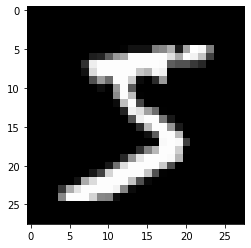

In [3]:
np.set_printoptions(linewidth=200)
plt.imshow(x_train[0], cmap='gray')
print(x_train[0])

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255.0

## Callback

In [5]:
class CallBack(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, log={}):
    if log.get('accuracy') >= .998:
      self.model.stop_training = True

## Modeling

In [6]:
model = keras.Sequential([
                          keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                          keras.layers.MaxPool2D(2, 2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [8]:
callback = CallBack()
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1341 - accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0477 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0289 - accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0044 - accuracy: 0.9987


## Prediction

In [9]:
y_pred = model.predict(x_test)

## Scoring

In [10]:
def findPredictionVal(arr):
  return np.argmax(arr, axis=0)

In [11]:
y_pred_val = np.array([])

for pred in y_pred:
  y_pred_val = np.append(y_pred_val, findPredictionVal(pred))

y_pred_val

array([7., 2., 1., ..., 4., 5., 6.])

In [12]:
accuracy_score(y_test, y_pred_val)

0.986

## Drawing & Predict

In [13]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.fillStyle = 'white'
ctx.fillRect(0, 0, canvas.width, canvas.height)
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
draw(filename = "num.png", w=400, h=400, line_width=25)

In [ ]:
img = cv2.imread('/content/num.png', 0)
img = cv2.resize(img, (28, 28))

np.set_printoptions(linewidth=200)
img = 255 - img
plt.imshow(img, cmap='gray')
print(img)

In [ ]:
pred = model.predict(img.reshape(1, 28, 28, 1))
findPredictionVal(pred[0])